In [111]:
from glob import glob
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h5 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Combined and Cleaned - Meets 1/1</small>
##### The datasets are combined into a single dataset held in a variable called **all_top_songs**.

In [112]:
filepaths = glob('spotifysongscsvs/*.csv')
df_list = [pd.read_csv(fp) for fp in filepaths]
all_top_songs = pd.concat(df_list, ignore_index=True)

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h5 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Project Files - Exceeds 1/1</small>
##### You additionally have an exported CSV of all the files combined called **top_spotify_songs.csv**

In [113]:
all_top_songs.to_csv('top_spotify_songs.csv', index=False)

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h5 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Questions - Meets 1/7</small>
##### What is the most popular song in the dataset?

**Memories** by Maroon 5 is the most popular song in the dataset. It has a popularity score of 99 out of 100.

In [114]:

most_popular_song = all_top_songs.loc[all_top_songs['pop'].idxmax()]
most_popular_song[['title', 'artist', 'pop']]

title     Memories
artist    Maroon 5
pop             99
Name: 0, dtype: object

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h5 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Questions - Meets 2/7</small>
##### What artist has the most songs in the dataset?
**Katy Perry** has the most songs in the dataset with **17** songs. She is followed by Justin Bieber with 16 songs and Maroon 5 with 15 songs.

In [115]:
all_top_songs['artist'].value_counts().head(1)

artist
Katy Perry    17
Name: count, dtype: int64

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h5 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Questions - Meets 3/7</small>
##### What is the most popular genre of music in the dataset?

Based on the number of songs in the dataset, the most popular genre of music is **Dance Pop** with **327** songs. It is followed by **Pop** with 60 songs, which *does* have a higher overall average popularity score, but a skewed result due to a much lower song count.

In [116]:
all_top_songs['top genre'].value_counts().head(1)

top genre
dance pop    327
Name: count, dtype: int64

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h5 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Questions - Meets 4/7</small>
##### Are there any songs in the dataset more than once?

Yes, there are **16** songs that appear more than once in the dataset.

In [117]:
duplicates = all_top_songs.groupby(['title', 'artist']).size().reset_index(name='count')
duplicate_songs = duplicates[duplicates['count'] > 1]
print(duplicate_songs)
print(f'\nTotal: {len(duplicate_songs)}')

                                               title         artist  count
11   A Little Party Never Killed Nobody (All We Got)         Fergie      2
20                                         All I Ask          Adele      2
85           Castle Walls (feat. Christina Aguilera)           T.I.      2
103                                          Company  Justin Bieber      2
162                                       First Time           Kygo      2
199                                             Here   Alessia Cara      2
254                             Just the Way You Are     Bruno Mars      2
259                                Kissing Strangers           DNCE      2
302                                    Love Yourself  Justin Bieber      2
313                                        Marry You     Bruno Mars      2
410                            Runnin' (Lose It All)    Naughty Boy      2
457                                         Stitches   Shawn Mendes      2
462                      

<style>
    * {
      margin: 0;
      padding: 0;
      box-sizing: border-box;
    }
    small {
      font-size: 10px;
    }
    h5 {
      margin-bottom: 5px;
    }
    p {
      font-size: 14px;
    }
</style>

<small>Questions - Meets 5/7 & Meets 6/7</small>
1. ##### Is there a relationship between popularity and danceability?
2. ##### Does having a higher bpm lead to having a higher energy score?

In both cases, while there is a positive relationship between the variables, the correlation is weak. While there is a trend, it's not definitive, and other factors also play a significant role.

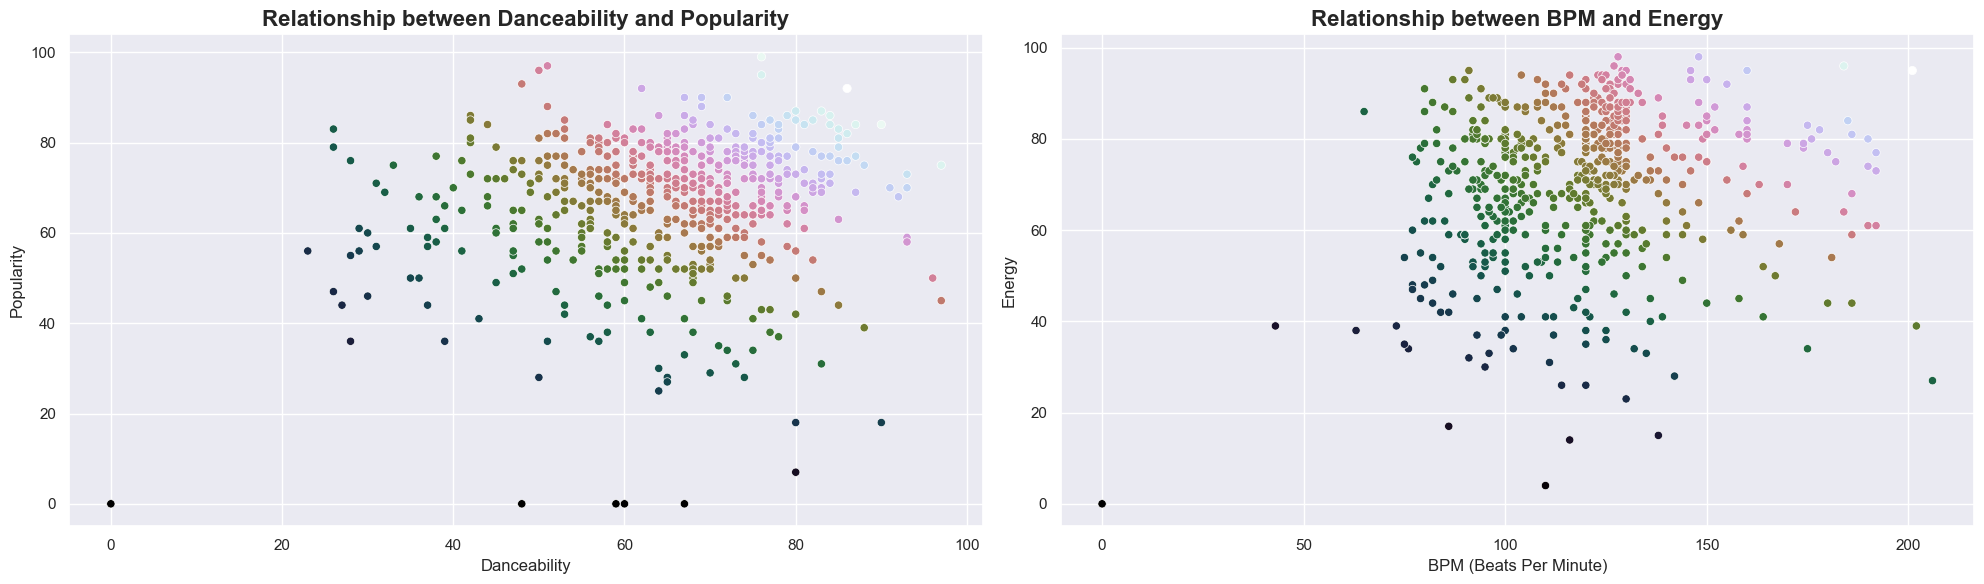

In [118]:
# Supress FutureWarning caused by Pandas v2.1.0
warnings.filterwarnings('ignore', category=FutureWarning)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

dnce_pop_gradient = all_top_songs['dnce'] * all_top_songs['pop']
sns.scatterplot(data=all_top_songs, x='dnce', y='pop', ax=ax1,
                hue=dnce_pop_gradient, palette="cubehelix", legend=False)
ax1.set_title('Relationship between Danceability and Popularity',
              fontsize=16, fontweight='bold')
ax1.set(xlabel=('Danceability'), ylabel=('Popularity'))

bpm_nrgy_gradient = all_top_songs['bpm'] * all_top_songs['nrgy']
sns.scatterplot(data=all_top_songs, x='bpm', y='nrgy', ax=ax2,
                hue=bpm_nrgy_gradient, palette="cubehelix", legend=False)
ax2.set_title('Relationship between BPM and Energy',
              fontsize=16, fontweight='bold')
ax2.set(xlabel='BPM (Beats Per Minute)', ylabel=('Energy'))

plt.tight_layout()
plt.show()
